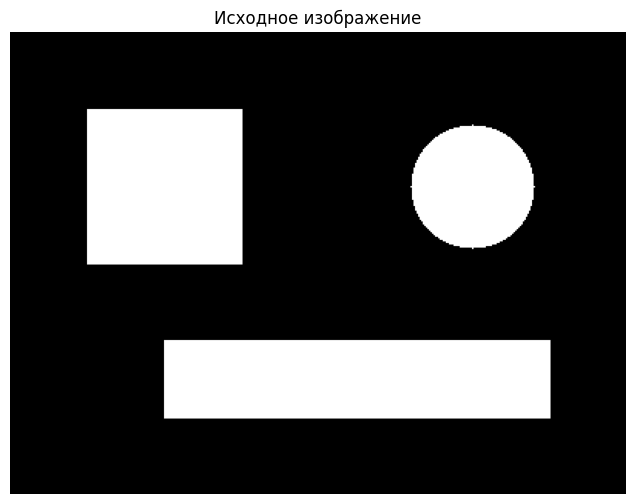

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Создаем простое тестовое изображение
def create_sample_image():
    """Создаем изображение с простыми геометрическими фигурами"""
    img = np.zeros((300, 400), dtype=np.uint8)
    
    # Рисуем различные фигуры
    cv2.rectangle(img, (50, 50), (150, 150), 255, -1)  # Белый квадрат
    cv2.circle(img, (300, 100), 40, 255, -1)           # Белый круг
    cv2.rectangle(img, (100, 200), (350, 250), 255, -1) # Белый прямоугольник
    
    return img

# Создаем изображение
image = create_sample_image()

# Показываем исходное изображение
plt.figure(figsize=(10, 6))
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

1. Обнаружение ключевых точек и вычисление дескрипторов SIFT

In [ ]:
# Инициализация SIFT детектора
sift = cv2.SIFT_create()

# Обнаружение ключевых точек и вычисление дескрипторов
# Алгоритм SIFT предназначен для обнаружения характерных особенностей изображения, таких как углы, пятна или края
keypoints, descriptors = sift.detectAndCompute(image, None)

print(f"Найдено ключевых точек: {len(keypoints)}")
print(f"Размерность дескрипторов: {descriptors.shape}")
print(f"Пример дескриптора (первые 10 значений): {descriptors[0][:10]}")

Найдено ключевых точек: 24
Размерность дескрипторов: (24, 128)
Пример дескриптора (первые 10 значений): [0. 0. 0. 0. 0. 0. 0. 0. 4. 0.]


In [60]:
points = np.array([keypoint.pt for keypoint in keypoints])
points.T

array([[100.12966156, 100.12966156, 100.12966156, 100.12966156,
        100.12966156, 100.12966156, 129.45173645, 129.45173645,
        138.09095764, 138.09095764, 145.22488403, 145.22488403,
        207.01420593, 262.93154907, 293.87625122, 300.23843384,
        300.23843384, 300.23843384, 320.14031982, 320.14031982,
        323.76309204, 329.84951782, 345.22488403, 345.22488403],
       [ 98.60025024,  98.60025024,  98.60025024,  98.60025024,
         98.60025024,  98.60025024, 225.64892578, 225.64892578,
        138.09379578, 138.09379578, 145.22489929, 145.22489929,
        140.93769836,  93.876297  ,  62.93153763,  99.86967468,
         99.86967468,  99.86967468, 225.28744507, 225.28744507,
        129.84938049, 123.76319885, 245.22489929, 245.22489929]])

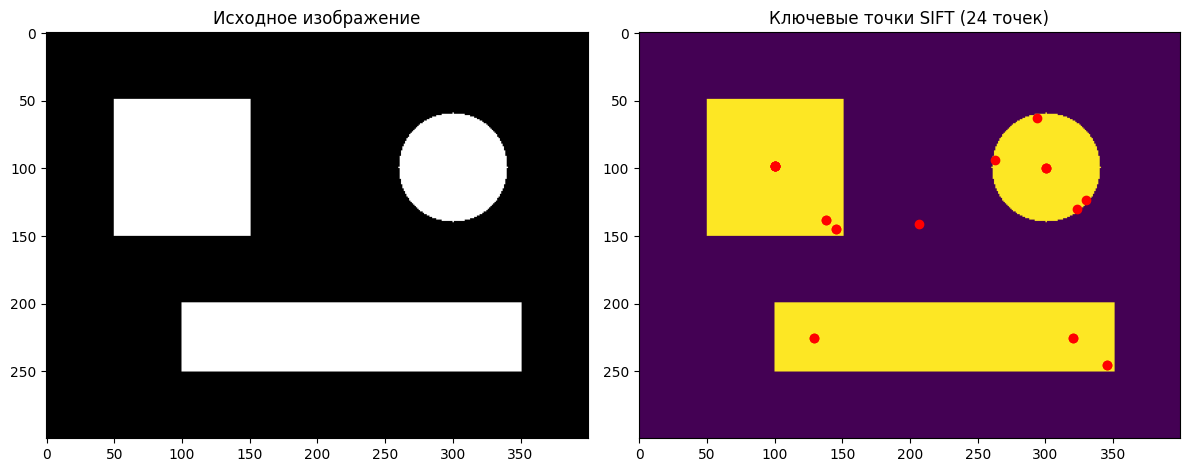

In [66]:
# Отображаем результат
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('on')



plt.subplot(1, 2, 2)
plt.imshow(image)
plt.scatter(points.T[0], points.T[1], c='red')
plt.title(f'Ключевые точки SIFT ({len(keypoints)} точек)')
plt.axis('on')

plt.tight_layout()
plt.show()

=== Анализ дескрипторов SIFT ===

Дескриптор 1:
  Координаты точки: (100.1, 98.6)
  Размер области: 69.3
  Угол ориентации: 54.5°
  Сила отклика: 0.1600
  Размер дескриптора: 128
  Диапазон значений: [0.0000, 127.0000]
  Среднее значение: 26.2266

Дескриптор 6:
  Координаты точки: (100.1, 98.6)
  Размер области: 69.3
  Угол ориентации: 355.3°
  Сила отклика: 0.1600
  Размер дескриптора: 128
  Диапазон значений: [0.0000, 123.0000]
  Среднее значение: 25.4297

Дескриптор 11:
  Координаты точки: (145.2, 145.2)
  Размер области: 8.7
  Угол ориентации: 185.2°
  Сила отклика: 0.0968
  Размер дескриптора: 128
  Диапазон значений: [0.0000, 176.0000]
  Среднее значение: 17.0000

Дескриптор 16:
  Координаты точки: (300.2, 99.9)
  Размер области: 50.6
  Угол ориентации: 114.1°
  Сила отклика: 0.1676
  Размер дескриптора: 128
  Диапазон значений: [0.0000, 116.0000]
  Среднее значение: 26.5000

Дескриптор 21:
  Координаты точки: (323.8, 129.8)
  Размер области: 4.2
  Угол ориентации: 231.3°
  Сила 

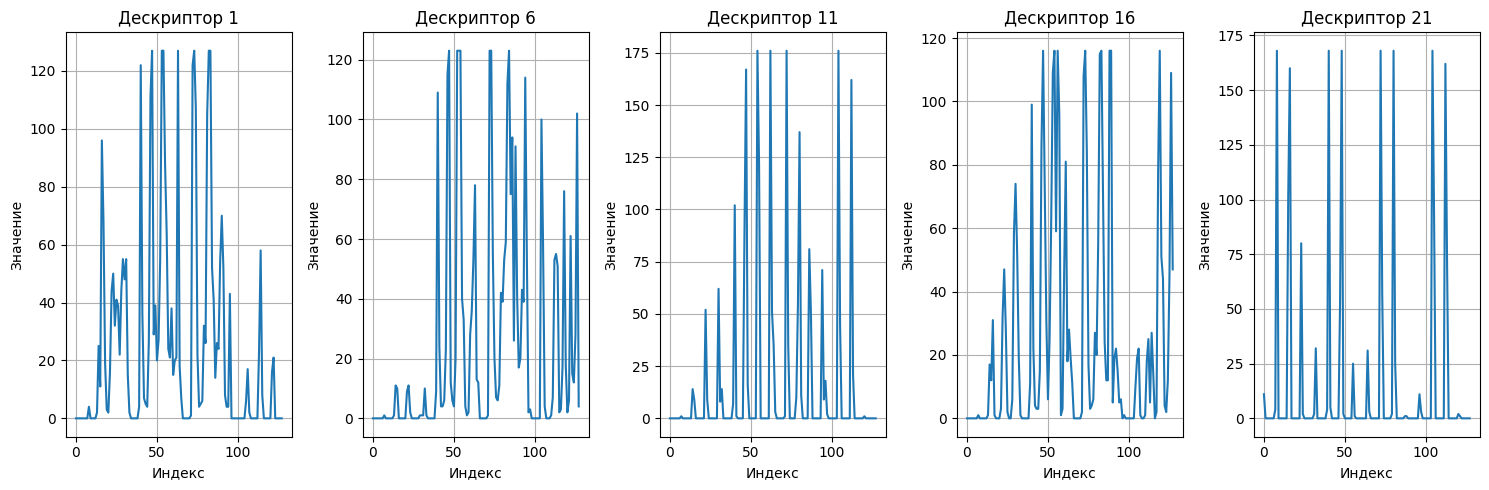

In [65]:
# Анализируем несколько дескрипторов
print("=== Анализ дескрипторов SIFT ===")
for i in range(0, len(descriptors), 5):
    desc = descriptors[i]
    kp = keypoints[i]
    
    print(f"\nДескриптор {i+1}:")
    print(f"  Координаты точки: ({kp.pt[0]:.1f}, {kp.pt[1]:.1f})")
    print(f"  Размер области: {kp.size:.1f}")
    print(f"  Угол ориентации: {kp.angle:.1f}°")
    print(f"  Сила отклика: {kp.response:.4f}")
    print(f"  Размер дескриптора: {len(desc)}")
    print(f"  Диапазон значений: [{desc.min():.4f}, {desc.max():.4f}]")
    print(f"  Среднее значение: {desc.mean():.4f}")

# Визуализируем распределение значений в дескрипторах
plt.figure(figsize=(15, 5))

# Первые 5 дескрипторов
for i in range(0, len(descriptors), 5):
    plt.subplot(1, 5, i//5 + 1)
    plt.plot(descriptors[i])
    plt.title(f'Дескриптор {i+1}')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.grid(True)

plt.tight_layout()
plt.show()

Сравнение двух изображений

In [77]:
# Создаем второе изображение (немного преобразованное)
def create_transformed_image():
    """Создаем преобразованную версию изображения"""
    img = create_sample_image()
    
    # Применяем аффинное преобразование
    rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), 15, 0.9)  # Поворот + масштаб
    img_transformed = cv2.warpAffine(img, M, (cols, rows))
    
    # Добавляем немного шума
    noise = np.random.normal(0, 255, img_transformed.shape).astype(np.uint8)
    img_transformed = cv2.add(img_transformed, noise)
    
    return img_transformed

# Создаем второе изображение
image2 = create_transformed_image()

# Вычисляем SIFT для второго изображения
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

print(f"Второе изображение: {len(keypoints2)} ключевых точек")

Второе изображение: 454 ключевых точек


In [78]:
points2 = np.array([keypoint.pt for keypoint in keypoints2])
points2.T

array([[  2.61363244,   3.95428848,   5.0612464 ,   5.46370363,
          5.57634258,   5.99435806,   5.99435806,   6.36458397,
          6.39276028,   9.66003799,  10.9539957 ,  11.36843014,
         11.36843014,  13.79092789,  13.99821091,  16.54074669,
         16.54074669,  16.54074669,  17.51005173,  17.51005173,
         18.07654572,  18.07654572,  18.07654572,  18.9514637 ,
         19.93271637,  20.19509888,  20.77124405,  20.77124405,
         21.78023148,  21.78023148,  21.78023148,  21.78023148,
         22.56085587,  22.9857502 ,  22.9857502 ,  24.34378624,
         24.34378624,  24.47606277,  24.47606277,  25.52474976,
         26.1339016 ,  26.40852356,  26.67864037,  27.51582909,
         28.75920296,  29.21017838,  31.64467239,  31.88607025,
         33.99392319,  33.99392319,  33.99392319,  34.60721588,
         35.70768356,  36.47395706,  37.01464844,  37.21693802,
         37.21693802,  37.31666565,  37.43750381,  38.33156204,
         39.23953247,  39.71255493,  39.

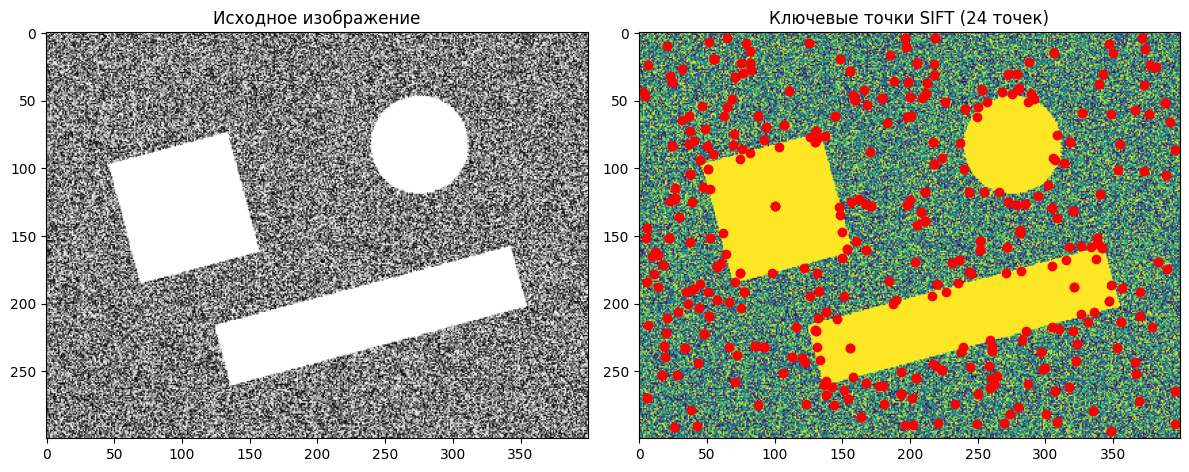

In [79]:
# Отображаем результат
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Исходное изображение')
plt.axis('on')



plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.scatter(points2.T[0], points2.T[1], c='red')
plt.title(f'Ключевые точки SIFT ({len(keypoints)} точек)')
plt.axis('on')

plt.tight_layout()
plt.show()

Сопоставление особенностей между изображениями

Найдено совпадений: 11
Лучшее расстояние: 49.5580
Худшее расстояние: 208.4131


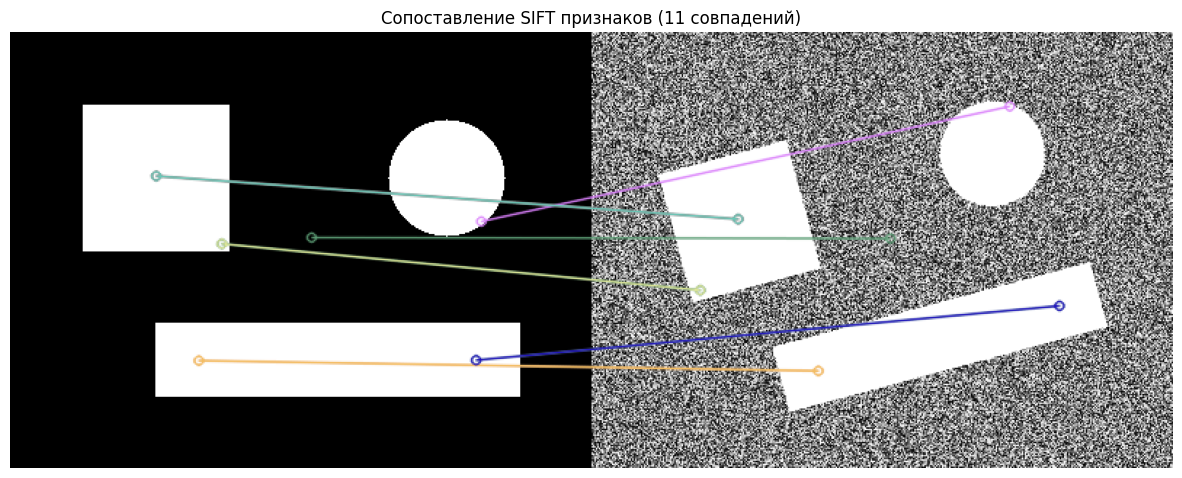

In [80]:
# Создаем матчер для сопоставления дескрипторов
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Сопоставляем дескрипторы
matches = bf.match(descriptors, descriptors2)

# Сортируем matches по расстоянию
matches = sorted(matches, key=lambda x: x.distance)

print(f"Найдено совпадений: {len(matches)}")
print(f"Лучшее расстояние: {matches[0].distance:.4f}")
print(f"Худшее расстояние: {matches[-1].distance:.4f}")

# Визуализируем совпадения
result_image = cv2.drawMatches(
    image, keypoints, 
    image2, keypoints2, 
    matches[:20],  # Показываем первые 20 лучших совпадений
    None, 
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(15, 8))
plt.imshow(result_image)
plt.title(f'Сопоставление SIFT признаков ({len(matches)} совпадений)')
plt.axis('off')
plt.show()

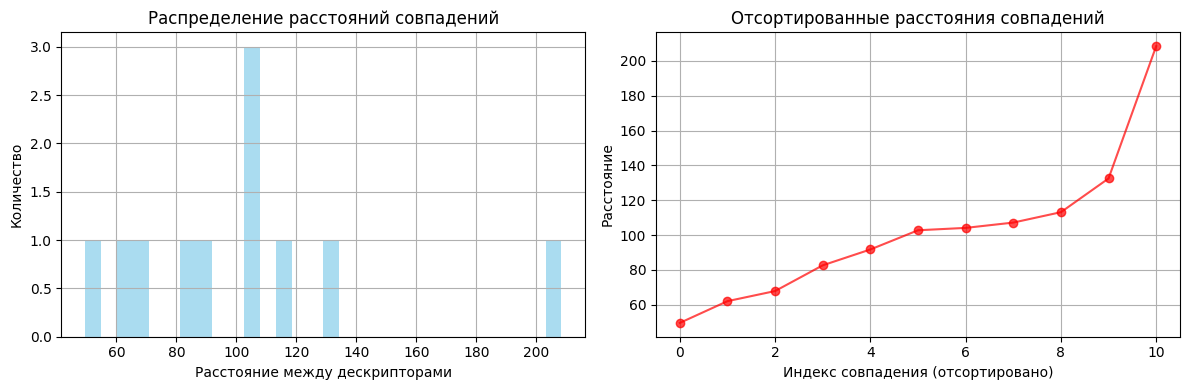

=== Статистика совпадений ===
Минимальное расстояние: 49.5580
Максимальное расстояние: 208.4131
Среднее расстояние: 101.9712
Медианное расстояние: 102.7278


In [81]:
# Анализируем расстояния между дескрипторами
distances = [m.distance for m in matches]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(distances, bins=30, alpha=0.7, color='skyblue')
plt.xlabel('Расстояние между дескрипторами')
plt.ylabel('Количество')
plt.title('Распределение расстояний совпадений')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sorted(distances), 'ro-', alpha=0.7)
plt.xlabel('Индекс совпадения (отсортировано)')
plt.ylabel('Расстояние')
plt.title('Отсортированные расстояния совпадений')
plt.grid(True)

plt.tight_layout()
plt.show()

# Показываем статистику
print("=== Статистика совпадений ===")
print(f"Минимальное расстояние: {min(distances):.4f}")
print(f"Максимальное расстояние: {max(distances):.4f}")
print(f"Среднее расстояние: {np.mean(distances):.4f}")
print(f"Медианное расстояние: {np.median(distances):.4f}")